In [7]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [8]:
redwine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";", header=0)
redwine["type"] = "red"
whitewine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";", header=0)
whitewine["type"] = "white"
wine = redwine.append(whitewine)

In [9]:
print(redwine.shape)
redwine

(1599, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [10]:
print(wine.shape)
wine

(6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [11]:
## 예측과 관계 없는 요소 제거
X = wine.drop(["type", "quality"], axis=1)
X.shape
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [12]:
y = wine["quality"]
print(y)
print(y.shape)

0       5
1       5
2       5
3       6
4       5
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 6497, dtype: int64
(6497,)


In [13]:
regr = LinearRegression()

In [14]:
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
r = regr.predict(X)
print(r[0])

4.997607397150453


In [16]:
## 평균 오차 확인
print(np.mean(np.abs(y - r)))

0.568315902311135


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4893    0.0
4894    1.0
4895   -1.0
4896   -1.0
4897    0.0
Name: quality, Length: 6497, dtype: float64


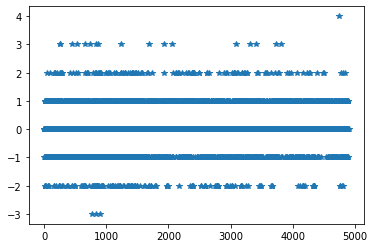

In [17]:
result = np.round(r) - y
print(result)
plt.plot(result, '*')

In [18]:
## 맞게 예측한 샘플의 개수 (1등급 차이까지 정답으로 봄)
np.sum(np.round(r) - y <= 1)

6355

In [19]:
## 정확도
np.sum(np.round(r) - y <= 1) / y.size

0.9781437586578421

In [20]:
print(regr.coef_)

[ 6.76839156e-02 -1.32789221e+00 -1.09656648e-01  4.35587507e-02
 -4.83713531e-01  5.96988830e-03 -2.48129841e-03 -5.49669422e+01
  4.39296072e-01  7.68251760e-01  2.67030009e-01]


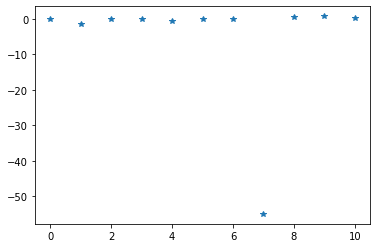

In [21]:
## 특징간 상관관계 plot
## 7번째 값이 높아지면 퀄리티에 심한 영향을 줌 (density)
plt.plot(regr.coef_, '*')

In [22]:
x = np.array([7.4, 0.5, 0.2, 0.3, 0.2, 0.4, 0.2, 1, 1.51, 1.0, 0.7])
print(x.shape)
print(regr.predict([x]))

(11,)
[2.14751738]


In [23]:
## 로지스틱 회귀

In [24]:
import numpy as np
samples = 200
x_data0 = np.random.normal(0, 1, size=[samples, 2]) ## 평균 0, 표준편차 1의 2차원 정규분포 데이터셋 생성
# x_data0 = np.random.normal(3, 1.5, size=[samples, 2]) ## 평균 3, 표준편차 1.5의 2차원 정규분포 데이터셋 생성
x_data1 = np.random.normal(5, 1, size=[samples, 2]) ## 평균 5, 표준편차 1의 2차원 정규분포 데이터셋 생성

In [25]:
x_data = np.vstack([x_data0, x_data1])
print(x_data.shape)

(400, 2)


In [26]:
y_data = np.vstack([np.zeros(samples).reshape(samples, 1), np.ones(samples).reshape(samples, 1)]) 
print(y_data.shape)
print(y_data)

(400, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 

['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red'

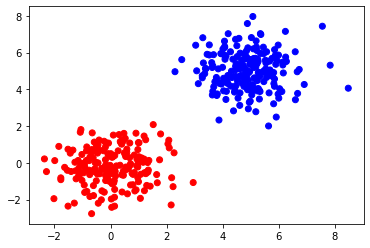

In [27]:
colors = ["red" if i == 0 else "blue" for i in y_data]
print(colors)
plt.scatter(x_data[:,0], x_data[:,1], color=colors)

In [28]:
regr = LinearRegression()
regr.fit(x_data, y_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
regr.predict(x_data[0:10])

array([[ 0.09344571],
       [ 0.05087878],
       [-0.03435076],
       [ 0.1952234 ],
       [ 0.05781154],
       [-0.12812426],
       [ 0.03452189],
       [-0.04391866],
       [ 0.15256841],
       [-0.05571744]])

In [30]:
regr.predict([[2.9, 2.1]])

array([[0.51010704]])

In [31]:
h = (regr.predict(x_data)[:, 0] > 0.5) * 1 
print(h)
## 맞춘 샘플의 개수
print(np.sum(h == y_data[:, 0]))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
400


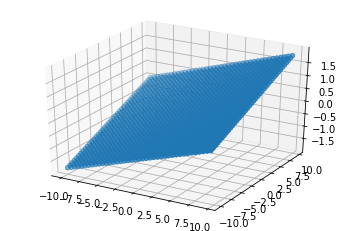

In [32]:
xx, yy = np.mgrid[-10:10:0.5, -10:10:0.5]
grid = np.c_[xx.flatten(), yy.flatten()]

result = regr.predict(grid)

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(xx.flatten(), yy.flatten(), result, 'r')

In [33]:
## 로지스틱 회귀로 풀기
log_reg = LogisticRegression()
log_reg.fit(x_data, y_data)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
p = log_reg.predict_proba([[1, 1]])
print(p)
print(p[0][1])

[[0.99137701 0.00862299]]
0.00862299140025776


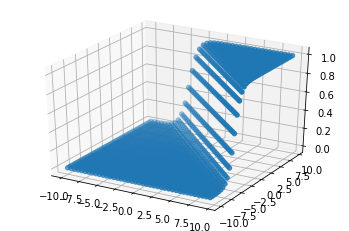

In [35]:
xx, yy = np.mgrid[-10:10:0.5, -10:10:0.5]
grid = np.c_[xx.flatten(), yy.flatten()]

result = log_reg.predict_proba(grid)[:, 1]
fig = plt.figure()
ax = plt.axes(projection="3d")

ax.scatter3D(xx.flatten(), yy.flatten(), result, 'r')

In [36]:
result = log_reg.predict_proba(grid)[:, 1]
result
log_reg.predict_proba(grid)

array([[1.00000000e+00, 7.23946946e-18],
       [1.00000000e+00, 1.58652655e-17],
       [1.00000000e+00, 3.47686597e-17],
       ...,
       [1.22901467e-09, 9.99999999e-01],
       [5.60810953e-10, 9.99999999e-01],
       [2.55903299e-10, 1.00000000e+00]])

In [37]:
result = log_reg.predict(grid)
print(result)

[0. 0. 0. ... 1. 1. 1.]


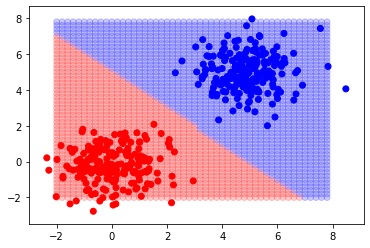

In [38]:
xx, yy = np.mgrid[-2:8:0.2, -2:8:0.2]
grid = np.c_[xx.flatten(), yy.flatten()]
p = log_reg.predict_proba(grid)
p = p[:, 1]

colors = ["red"  if i<  0.5  else  "blue"  for i in p ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)

colors = ["red"  if i == 0  else  "blue"  for i  in y_data]
plt.scatter(x_data[:,0], x_data[:,1], color=colors)

In [40]:
## 당뇨병 예측
data = np.loadtxt('diabetes.xls', delimiter=',', dtype=np.float32)
print(data.shape)
data

(768, 9)


array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]],
      dtype=float32)

In [41]:
"""
임신횟수
글루코스 내성 실험 후의 혈당수치
확장기 혈압(mm Hg)
상완 삼두근 피부 두께 (mm)
혈액내 인슐린 수치 (mu U/ml)
BMI(비만도) 수치 (weight in kg/(height in m)^2)
당뇨병 가족력: 계산식은 데이터세트의 출처에서 확인하세요.
나이 (years)
당뇨병 여부 (0 or 1; 1은 발병)
"""

label = ["임신횟수", "글루코스 내성 실험 후의 혈당수치", "확장기 혈압", "상완 삼두근 피부 두께",
         "혈액내 인슐린 수치", "BMI", "당뇨병 가족력", "나이"]

In [42]:
dim = 8
x_data = data[:, 0:dim]
y_data = data[:, dim]
print(y_data.shape)
y_data = y_data.reshape(768, 1)
print(x_data.shape)
print(y_data.shape)

(768,)
(768, 8)
(768, 1)


In [43]:
## 학습시키기
log_reg = LogisticRegression()
log_reg.fit(x_data, y_data)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
## 예측하기
h = log_reg.predict(x_data)
h

array([1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0.

In [45]:
correct = np.sum(h == y_data[:, 0])
print(correct)
print(y_data.size)
print("모델 성능 평가 : ", correct / y_data.size)
print(np.mean(h == y_data))

599
768
모델 성능 평가 :  0.7799479166666666
0.5688340928819444


In [51]:
"""
임신횟수 : 0
글루코스 내성 실험 후의 혈당수치 : 90
확장기 혈압 :  66
상완 삼두근 피부 두께 :  29
혈액내 인슐린 수치 : 0 
BMI(비만도) 수치 : 26.6
당뇨병 가족력 : 0.351
나이 : 30
"""

'\n임신횟수 : 0\n글루코스 내성 실험 후의 혈당수치 : 90\n확장기 혈압 :  66\n상완 삼두근 피부 두께 :  29\n혈액내 인슐린 수치 : 0 \nBMI(비만도) 수치 : 26.6\n당뇨병 가족력 : 0.351\n나이 : 30\n'

[0.]
[ 1.35990141e-01  3.42941613e-02 -1.26071020e-02 -3.67080947e-03
 -9.42964261e-04  8.90818248e-02  1.51646567e+00  1.05571736e-02]


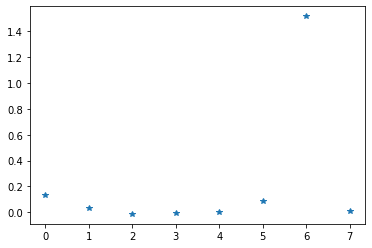

In [50]:
me = log_reg.predict([[0, 90, 66, 29, 0, 26.6, 0.351, 90]])
print(me)
print(log_reg.coef_[0])
plt.plot(log_reg.coef_[0], '*')

In [53]:
for i in range(dim):
    print(label[i], ':', log_reg.coef_[0, i])

임신횟수 : 0.1359901412917452
글루코스 내성 실험 후의 혈당수치 : 0.03429416125425302
확장기 혈압 : -0.012607102035581491
상완 삼두근 피부 두께 : -0.0036708094698981006
혈액내 인슐린 수치 : -0.0009429642609238423
BMI : 0.08908182478527499
당뇨병 가족력 : 1.5164656688092761
나이 : 0.010557173615741048


In [55]:
dim = 8
x_data = data[:, 0:dim]
y_data = data[:, dim]
print(y_data.shape)
y_data = y_data.reshape(768, 1)
print(x_data.shape)
print(y_data.shape)

## 정규화
mx = np.max(x_data, axis=0)
print(mx)

x_data = x_data / mx
print(x_data)

(768,)
(768, 8)
(768, 1)
[ 17.   199.   122.    99.   846.    67.1    2.42  81.  ]
[[0.3529412  0.74371856 0.59016395 ... 0.5007451  0.2590909  0.61728394]
 [0.05882353 0.42713568 0.5409836  ... 0.39642325 0.14504132 0.38271606]
 [0.47058824 0.919598   0.52459013 ... 0.34724292 0.27768594 0.39506173]
 ...
 [0.29411766 0.6080402  0.59016395 ... 0.390462   0.10123967 0.37037036]
 [0.05882353 0.63316584 0.4918033  ... 0.44858423 0.14421487 0.5802469 ]
 [0.05882353 0.46733668 0.57377046 ... 0.45305514 0.13016528 0.28395063]]


In [56]:
x_data2 = np.array([
    [0, 90, 66, 29, 0, 26.6, 0.351, 30],
    [0, 90, 66, 29, 0, 31.0, 0.351, 30],
])

x_data2 = x_data2 / mx
log_reg.predict_proba(x_data2)

array([[9.99713116e-01, 2.86884039e-04],
       [9.99711436e-01, 2.88564271e-04]])

[0.14285714 0.28571429 0.57142857]
[0.02443891 0.08114005 0.89442104]


([<matplotlib.patches.Wedge at 0x1876e62c488>,
 [Text(1.0967594940433238, 0.08437186868757104, ''),
  Text(1.0095055570964817, 0.4369193634886445, ''),
  Text(-1.0400440953569972, -0.358201451299469, '')])

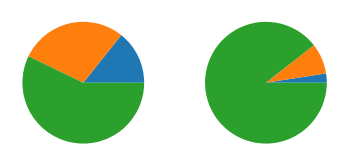

In [57]:
p = np.array([1.2, 2.4, 4.8])
p_ = p / np.sum([p])

print(p_)

p2 = np.exp(np.array([1.2, 2.4, 4.8]))  # softmax 알고리즘
p2_ = p2 / np.sum(p2)

print(p2_)
plt.subplot(1, 2, 1)
plt.pie(p_)
plt.subplot(1, 2, 2)
plt.pie(p2_)

In [58]:
## iris 데이터셋 분류
iris = datasets.load_iris()
list(iris.keys())
print(iris.data)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [59]:
x = iris.data
y = iris.target
print(x.shape)
print(y.shape)
x_ = iris.data[:, [0, 2]]
x_

(150, 4)
(150,)


array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.4],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [60]:
log_reg.fit(x_, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
np.mean(log_reg.predict(x_) == y)

0.96

In [62]:
log_reg.predict(x_)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [63]:
log_reg.coef_

array([[-0.27474561, -3.10539363],
       [ 0.49060283, -0.43408086],
       [-0.21585722,  3.5394745 ]])

In [64]:
print(iris.data[:, [0, 2]])

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.4]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]

In [66]:
log_reg.predict_proba([[1, 1]])

array([[9.99621553e-01, 3.78443681e-04, 3.09534408e-09]])

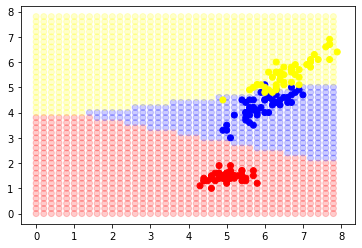

In [67]:
xx, yy = np.mgrid[:8:0.2, 0:8:0.2]
grid = np.c_[xx.flatten(), yy.flatten()]
p = log_reg.predict(grid)

d = ['red', 'blue', 'yellow']
colors = [d[i] for i in p]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)

colors = [d[i] for i in y]
plt.scatter(x[:, 0], x[:, 2], color = colors)